In [1]:
import pandas as pd
import numpy as np
import dask
import dask.dataframe as dd
import dask.multiprocessing

import glob
import os

pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)

In [2]:
all_columns_for_data = [
    "POOL_ID", "LOAN_ID", "ACT_PERIOD", "CHANNEL", "SELLER", "SERVICER",
                        "MASTER_SERVICER", "ORIG_RATE", "CURR_RATE", "ORIG_UPB", "ISSUANCE_UPB",
                        "CURRENT_UPB", "ORIG_TERM", "ORIG_DATE", "FIRST_PAY", "LOAN_AGE",
                        "REM_MONTHS", "ADJ_REM_MONTHS", "MATR_DT", "OLTV", "OCLTV",
                        "NUM_BO", "DTI", "CSCORE_B", "CSCORE_C", "FIRST_FLAG", "PURPOSE",
                        "PROP", "NO_UNITS", "OCC_STAT", "STATE", "MSA", "ZIP", "MI_PCT",
                        "PRODUCT", "PPMT_FLG", "IO", "FIRST_PAY_IO", "MNTHS_TO_AMTZ_IO",
                        "DLQ_STATUS", "PMT_HISTORY", "MOD_FLAG", "MI_CANCEL_FLAG", "Zero_Bal_Code",
                        "ZB_DTE", "LAST_UPB", "RPRCH_DTE", "CURR_SCHD_PRNCPL", "TOT_SCHD_PRNCPL",
                        "UNSCHD_PRNCPL_CURR", "LAST_PAID_INSTALLMENT_DATE", "FORECLOSURE_DATE",
                        "DISPOSITION_DATE", "FORECLOSURE_COSTS", "PROPERTY_PRESERVATION_AND_REPAIR_COSTS",
                        "ASSET_RECOVERY_COSTS", "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
                        "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY", "NET_SALES_PROCEEDS",
                        "CREDIT_ENHANCEMENT_PROCEEDS", "REPURCHASES_MAKE_WHOLE_PROCEEDS",
                        "OTHER_FORECLOSURE_PROCEEDS", "NON_INTEREST_BEARING_UPB", "PRINCIPAL_FORGIVENESS_AMOUNT",
                        "ORIGINAL_LIST_START_DATE", "ORIGINAL_LIST_PRICE", "CURRENT_LIST_START_DATE",
                        "CURRENT_LIST_PRICE", "ISSUE_SCOREB", "ISSUE_SCOREC", "CURR_SCOREB",
                        "CURR_SCOREC", "MI_TYPE", "SERV_IND", "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT",
                        "CUMULATIVE_MODIFICATION_LOSS_AMOUNT", "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS",
                        "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS", "HOMEREADY_PROGRAM_INDICATOR",
                        "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT", "RELOCATION_MORTGAGE_INDICATOR",
                        "ZERO_BALANCE_CODE_CHANGE_DATE", "LOAN_HOLDBACK_INDICATOR", "LOAN_HOLDBACK_EFFECTIVE_DATE",
                        "DELINQUENT_ACCRUED_INTEREST", "PROPERTY_INSPECTION_WAIVER_INDICATOR",
                        "HIGH_BALANCE_LOAN_INDICATOR", "ARM_5_YR_INDICATOR", "ARM_PRODUCT_TYPE",
                        "MONTHS_UNTIL_FIRST_PAYMENT_RESET", "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET",
                        "INTEREST_RATE_CHANGE_DATE", "PAYMENT_CHANGE_DATE", "ARM_INDEX",
                        "ARM_CAP_STRUCTURE", "INITIAL_INTEREST_RATE_CAP", "PERIODIC_INTEREST_RATE_CAP",
                        "LIFETIME_INTEREST_RATE_CAP", "MARGIN", "BALLOON_INDICATOR",
                        "PLAN_NUMBER", "FORBEARANCE_INDICATOR", "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR",
                        "DEAL_NAME", "RE_PROCS_FLAG", "ADR_TYPE", "ADR_COUNT", "ADR_UPB"
]

all_dtypes_for_data = {
    "POOL_ID": str, "LOAN_ID": str, "ACT_PERIOD": str, "CHANNEL": str, "SELLER": str, "SERVICER": str,
                        "MASTER_SERVICER": str, "ORIG_RATE": float, "CURR_RATE": str, "ORIG_UPB": str, "ISSUANCE_UPB": str,
                        "CURRENT_UPB": str, "ORIG_TERM": str, "ORIG_DATE": str, "FIRST_PAY": str, "LOAN_AGE": str,
                        "REM_MONTHS": str, "ADJ_REM_MONTHS": str, "MATR_DT": str, "OLTV": str, "OCLTV": str,
                        "NUM_BO": str, "DTI": str, "CSCORE_B": str, "CSCORE_C": str, "FIRST_FLAG": str, "PURPOSE": str,
                        "PROP": str, "NO_UNITS": str, "OCC_STAT": str, "STATE": str, "MSA": str, "ZIP": str, "MI_PCT": str,
                        "PRODUCT": str, "PPMT_FLG": str, "IO": str, "FIRST_PAY_IO": str, "MNTHS_TO_AMTZ_IO": str,
                        "DLQ_STATUS": str, "PMT_HISTORY": str, "MOD_FLAG": str, "MI_CANCEL_FLAG": str, "Zero_Bal_Code": str,
                        "ZB_DTE": str, "LAST_UPB": str, "RPRCH_DTE": str, "CURR_SCHD_PRNCPL": str, "TOT_SCHD_PRNCPL": str,
                        "UNSCHD_PRNCPL_CURR": str , "LAST_PAID_INSTALLMENT_DATE": str, "FORECLOSURE_DATE": str,
                        "DISPOSITION_DATE": str, "FORECLOSURE_COSTS": str, "PROPERTY_PRESERVATION_AND_REPAIR_COSTS": str,
                        "ASSET_RECOVERY_COSTS": str, "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS": str,
                        "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY": str, "NET_SALES_PROCEEDS": str,
                        "CREDIT_ENHANCEMENT_PROCEEDS": str, "REPURCHASES_MAKE_WHOLE_PROCEEDS": str,
                        "OTHER_FORECLOSURE_PROCEEDS": str, "NON_INTEREST_BEARING_UPB": str, "PRINCIPAL_FORGIVENESS_AMOUNT": str,
                        "ORIGINAL_LIST_START_DATE": str, "ORIGINAL_LIST_PRICE": str, "CURRENT_LIST_START_DATE": str,
                        "CURRENT_LIST_PRICE": str, "ISSUE_SCOREB": str, "ISSUE_SCOREC": str, "CURR_SCOREB": str,
                        "CURR_SCOREC": str, "MI_TYPE": str, "SERV_IND": str, "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT": str,
                        "CUMULATIVE_MODIFICATION_LOSS_AMOUNT": str, "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS": str,
                        "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS": str, "HOMEREADY_PROGRAM_INDICATOR": str,
                        "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT": str, "RELOCATION_MORTGAGE_INDICATOR": str,
                        "ZERO_BALANCE_CODE_CHANGE_DATE": str, "LOAN_HOLDBACK_INDICATOR": str, "LOAN_HOLDBACK_EFFECTIVE_DATE": str,
                        "DELINQUENT_ACCRUED_INTEREST": str, "PROPERTY_INSPECTION_WAIVER_INDICATOR": str,
                        "HIGH_BALANCE_LOAN_INDICATOR": str, "ARM_5_YR_INDICATOR": str, "ARM_PRODUCT_TYPE": str,
                        "MONTHS_UNTIL_FIRST_PAYMENT_RESET": str, "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET": str,
                        "INTEREST_RATE_CHANGE_DATE": str, "PAYMENT_CHANGE_DATE": str, "ARM_INDEX": str,
                        "ARM_CAP_STRUCTURE": str, "INITIAL_INTEREST_RATE_CAP": str, "PERIODIC_INTEREST_RATE_CAP": str,
                        "LIFETIME_INTEREST_RATE_CAP": str, "MARGIN": str, "BALLOON_INDICATOR": str,
                        "PLAN_NUMBER": str, "FORBEARANCE_INDICATOR": str, "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR": str,
                        "DEAL_NAME": str, "RE_PROCS_FLAG": str, "ADR_TYPE": str, "ADR_COUNT": str, "ADR_UPB": str,
}

cols_to_use = [
"LOAN_ID",
"ORIG_RATE",
"CURR_RATE",
"ORIG_UPB",
"CURRENT_UPB",
"ORIG_TERM",
"ORIG_DATE",
# "FIRST_PAY",
"LOAN_AGE",
# "REM_MONTHS",
# "ADJ_REM_MONTHS",
# "MATR_DT",
"OLTV",
"NUM_BO",
"DTI",
"CSCORE_B",
"CSCORE_C",
"FIRST_FLAG",
"PURPOSE",
"PROP",
"NO_UNITS",
"OCC_STAT",
"MI_PCT",
"PRODUCT",
"PPMT_FLG",
"IO",
"DLQ_STATUS",
"MOD_FLAG",
"Zero_Bal_Code",
# "ZB_DTE",
"LAST_UPB",
"TOT_SCHD_PRNCPL",
"NON_INTEREST_BEARING_UPB",
"MI_TYPE",
]

In [3]:
path = "/Users/Kerryn/credit_risk_stuff/pit_vs_ttc/DATA/zip/" # use your path
all_files = glob.glob(os.path.join(path , "*.zip"))

all_files

['/Users/Kerryn/credit_risk_stuff/pit_vs_ttc/DATA/zip/2007Q4.zip',
 '/Users/Kerryn/credit_risk_stuff/pit_vs_ttc/DATA/zip/2007Q3.zip',
 '/Users/Kerryn/credit_risk_stuff/pit_vs_ttc/DATA/zip/2007Q2.zip',
 '/Users/Kerryn/credit_risk_stuff/pit_vs_ttc/DATA/zip/2007Q1.zip']

In [4]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, sep="|", header=0, names=all_columns_for_data, compression='zip', dtype=str)
    df = df[df['STATE'] == 'NY']
    df = df[cols_to_use]
    li.append(df)

df_2007 = pd.concat(li, axis=0, ignore_index=True)

In [5]:
df_2007.head()

,LOAN_ID,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,LOAN_AGE,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,MI_PCT,PRODUCT,PPMT_FLG,IO,DLQ_STATUS,MOD_FLAG,Zero_Bal_Code,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE
0,100055723684,6.875,6.875,331000.00,0.00,360,092007,0,71,2,40,623,609,N,C,SF,1,P,NaN,FRM,N,N,00,N,NaN,NaN,NaN,NaN,NaN
1,100055723684,6.875,6.875,331000.00,0.00,360,092007,1,71,2,40,623,609,N,C,SF,1,P,NaN,FRM,N,N,00,N,NaN,NaN,NaN,NaN,NaN
2,100055723684,6.875,6.875,331000.00,0.00,360,092007,2,71,2,40,623,609,N,C,SF,1,P,NaN,FRM,N,N,00,N,NaN,NaN,NaN,NaN,NaN
3,100055723684,6.875,6.875,331000.00,0.00,360,092007,3,71,2,40,623,609,N,C,SF,1,P,NaN,FRM,N,N,00,N,NaN,NaN,NaN,NaN,NaN
4,100055723684,6.875,6.875,331000.00,0.00,360,092007,4,71,2,40,623,609,N,C,SF,1,P,NaN,FRM,N,N,00,N,NaN,NaN,NaN,NaN,NaN


In [6]:
df_2007.isna().sum()/len(df_2007)

LOAN_ID                     0.000000
ORIG_RATE                   0.000000
CURR_RATE                   0.013257
ORIG_UPB                    0.000000
CURRENT_UPB                 0.000000
ORIG_TERM                   0.000000
ORIG_DATE                   0.000000
LOAN_AGE                    0.013297
OLTV                        0.000000
NUM_BO                      0.000032
DTI                         0.026358
CSCORE_B                    0.001758
CSCORE_C                    0.677049
FIRST_FLAG                  0.001268
PURPOSE                     0.000000
PROP                        0.000000
NO_UNITS                    0.000000
OCC_STAT                    0.000000
MI_PCT                      0.811570
PRODUCT                     0.000000
PPMT_FLG                    0.000754
IO                          0.071964
DLQ_STATUS                  0.000000
MOD_FLAG                    0.013264
Zero_Bal_Code               0.986703
LAST_UPB                    0.986704
TOT_SCHD_PRNCPL             0.966479
N

In [8]:
df_2007.to_parquet("df_2007.parquet")

In [7]:
df_2007['LOAN_ID'].nunique()
# 1_750_213
# 48258

48258

/Users/Kerryn/credit_risk_stuff/pit_vs_ttc/DATA/zip/2000Q1.zip


In [9]:
nans_to_fill = {
    'CURR_RATE': '-1.00',
    'LOAN_AGE': '-1',
    'NUM_BO': -1,
    # 'REM_MONTHS': '-1',
    # 'ADJ_REM_MONTHS': '-1',
    'MATR_DT': '122099',
    'DTI': '-1',
    'CSCORE_B': '-1',
    'CSCORE_C': '-1',
    'FIRST_FLAG': 'U',
    'MI_PCT': '-1.00',
    'PPMT_FLG': 'U',
    'IO': 'U',
    'MOD_FLAG': 'U',
    'Zero_Bal_Code': '00',
    'ZB_DTE': '012000',
    'LAST_UPB': '-999999.99',
    'TOT_SCHD_PRNCPL': '-999999.99',
    'NON_INTEREST_BEARING_UPB': '-999999.99',
    'MI_TYPE': '0',
    'DQL_STATUS': 'XX',
}

In [19]:
float_columns = [
    'ORIG_RATE', 
    'CURR_RATE',
    'ORIG_UPB',
    'CURRENT_UPB',
    'MI_PCT',
    'LAST_UPB',
    'TOT_SCHD_PRNCPL',
    'NON_INTEREST_BEARING_UPB',
]

int_columns = [
    'ORIG_TERM',
    'LOAN_AGE',
    'NUM_BO',
    # 'REM_MONTHS',
    # 'ADJ_REM_MONTHS',
    'OLTV',
    'CSCORE_B',
    'CSCORE_C',
    'NO_UNITS',
    'MI_TYPE',
    'DTI',
    'DLQ_STATUS',
]

date_columns = [
    'ORIG_DATE',
    # 'FIRST_PAY',
    # 'MATR_DT',
    # 'ZB_DTE',
]

In [ ]:
cols = [
    'LOAN_ID', 
    'ORIG_RATE', 
    'CURR_RATE', 
    'ORIG_UPB', 
    'CURRENT_UPB',
    'ORIG_TERM', 
    'ORIG_DATE', 
    'LOAN_AGE', 
    'OLTV', 
    'NUM_BO', 
    'DTI',
    'CSCORE_B', 
    'CSCORE_C', 
    'FIRST_FLAG', 
    'PURPOSE', 
    'PROP', 
    'NO_UNITS',
    'OCC_STAT', 
    'MI_PCT', 
    'PRODUCT', 
    'PPMT_FLG', 
    'IO', 
    'DLQ_STATUS',
    'MOD_FLAG', 
    'Zero_Bal_Code', 
    'LAST_UPB', 
    'TOT_SCHD_PRNCPL',
    'NON_INTEREST_BEARING_UPB', 
    'MI_TYPE'
    ]

In [14]:
# df_2007 = df_2007.fillna(nans_to_fill)

clean_df = df_2007[df_2007['DLQ_STATUS']!= 'XX']
clean_df = clean_df[clean_df['LOAN_AGE']!= '-1']

# dd_clean = dd_clean[cols_to_use]

# # str -> float
# dd_clean[float_columns] = dd_clean[float_columns].astype('float')

# # str -> float (will convert to int after nans have been dealt with)
# dd_clean[int_columns] = dd_clean[int_columns].astype('int32')

# drop nans

clean_df = clean_df.dropna()

In [18]:
clean_df.columns

Index(['LOAN_ID', 'ORIG_RATE', 'CURR_RATE', 'ORIG_UPB', 'CURRENT_UPB',
       'ORIG_TERM', 'ORIG_DATE', 'LOAN_AGE', 'OLTV', 'NUM_BO', 'DTI',
       'CSCORE_B', 'CSCORE_C', 'FIRST_FLAG', 'PURPOSE', 'PROP', 'NO_UNITS',
       'OCC_STAT', 'MI_PCT', 'PRODUCT', 'PPMT_FLG', 'IO', 'DLQ_STATUS',
       'MOD_FLAG', 'Zero_Bal_Code', 'LAST_UPB', 'TOT_SCHD_PRNCPL',
       'NON_INTEREST_BEARING_UPB', 'MI_TYPE'],
      dtype='object')

In [20]:
# str -> float
clean_df[float_columns] = clean_df[float_columns].astype('float')

# str -> float (will convert to int after nans have been dealt with)
clean_df[int_columns] = clean_df[int_columns].astype('int32')

# str -> date in two steps
# step 1: convert to dt
clean_df[date_columns] = clean_df[date_columns].apply(pd.to_datetime, axis=1)

# step 2: remove days from dates only have month and year for multiple columns 
# for dt_col in date_columns:
#     pit_data[dt_col] = pit_data[dt_col].apply(lambda x: x.strftime('%Y-%m'))

clean_df['current_month'] = (clean_df["ORIG_DATE"] + pd.to_timedelta(clean_df['LOAN_AGE']*31,'d')) + pd.offsets.MonthEnd(0)

NameError: name 'dd_pit' is not defined

In [21]:
clean_df.info()
# 3_351_429

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3308940 entries, 0 to 3351429
Data columns (total 29 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   LOAN_ID                   object        
 1   ORIG_RATE                 float64       
 2   CURR_RATE                 float64       
 3   ORIG_UPB                  float64       
 4   CURRENT_UPB               float64       
 5   ORIG_TERM                 int32         
 6   ORIG_DATE                 datetime64[ns]
 7   LOAN_AGE                  int32         
 8   OLTV                      int32         
 9   NUM_BO                    int32         
 10  DTI                       int32         
 11  CSCORE_B                  int32         
 12  CSCORE_C                  int32         
 13  FIRST_FLAG                object        
 14  PURPOSE                   object        
 15  PROP                      object        
 16  NO_UNITS                  int32         
 17  OCC_STAT

In [22]:
clean_df['current_month'] = (clean_df["ORIG_DATE"] + pd.to_timedelta(clean_df['LOAN_AGE']*31,'d')) + pd.offsets.MonthEnd(0)
clean_df['macro_yr'] = clean_df['current_month'].dt.strftime('%Y-%m-%d').str[:4]

obj_cols = ['FIRST_FLAG', 'PURPOSE', 'PROP', 'OCC_STAT', 'PRODUCT', 'PPMT_FLG', 'IO', 'MOD_FLAG', 'Zero_Bal_Code']

clean_df_dummies = pd.get_dummies(clean_df, columns=obj_cols)

AttributeError: module 'pandas' has no attribute 'clean_df'

In [23]:
clean_df_dummies = pd.get_dummies(clean_df, columns=obj_cols)

In [25]:
clean_df_dummies['default_12m'] = np.where(clean_df_dummies['DLQ_STATUS'].between(3, 12), 1, 0)
clean_df_dummies['default_24m'] = np.where(clean_df_dummies['DLQ_STATUS'].between(13, 24), 1, 0)
clean_df_dummies['default_24m_plus'] = np.where(clean_df_dummies['DLQ_STATUS'] > 24, 1, 0)

In [37]:
clean_df_dummies = clean_df_dummies[clean_df_dummies["LOAN_AGE"] >= 0]
clean_df_dummies.head()

,LOAN_ID,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,LOAN_AGE,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,NO_UNITS,MI_PCT,DLQ_STATUS,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE,current_month,macro_yr,FIRST_FLAG_N,FIRST_FLAG_U,FIRST_FLAG_Y,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,PRODUCT_FRM,PPMT_FLG_N,PPMT_FLG_U,IO_N,IO_U,MOD_FLAG_N,MOD_FLAG_U,MOD_FLAG_Y,Zero_Bal_Code_00,Zero_Bal_Code_01,Zero_Bal_Code_03,Zero_Bal_Code_06,Zero_Bal_Code_09,Zero_Bal_Code_15,Zero_Bal_Code_16,default_12m,default_24m,default_24m_plus
0,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,0,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-09-30,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,1,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-10-31,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,2,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-11-30,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,3,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-12-31,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,4,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2008-01-31,2008,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0


## corr

In [27]:
corr = clean_df_dummies.corr()
# get correlations of the features with the target
corr['default_12m'].sort_values(ascending=False)

default_12m                 1.000000
DLQ_STATUS                  0.100490
MOD_FLAG_Y                  0.098875
NON_INTEREST_BEARING_UPB    0.098559
CURRENT_UPB                 0.096902
ORIG_UPB                    0.063142
ORIG_RATE                   0.056157
LOAN_AGE                    0.050368
ORIG_TERM                   0.047743
DTI                         0.045925
OLTV                        0.045448
IO_N                        0.042293
PROP_SF                     0.038751
PURPOSE_C                   0.032661
TOT_SCHD_PRNCPL             0.026733
MI_TYPE                     0.024164
MI_PCT                      0.023233
FIRST_FLAG_N                0.022133
OCC_STAT_P                  0.020053
PURPOSE_R                   0.013765
Zero_Bal_Code_00            0.004450
PPMT_FLG_U                  0.003655
Zero_Bal_Code_09            0.000759
Zero_Bal_Code_06           -0.000099
Zero_Bal_Code_03           -0.000197
Zero_Bal_Code_15           -0.001094
FIRST_FLAG_U               -0.001862
N

In [49]:
# clean_df_dummies.to_parquet("clean_df_dummies_2007.parquet")

## single loan id

In [31]:
# get ids with default 12m
clean_df_dummies.loc[clean_df_dummies['default_12m'] == 1]['LOAN_ID'].unique()

array(['100302426329', '101520075023', '101602320808', ...,
       '997178601115', '997712936998', '998327406916'], dtype=object)

In [38]:
# single loan_id
id_bad = clean_df_dummies[clean_df_dummies['LOAN_ID'] == "997712936998"]
id_bad


,LOAN_ID,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,LOAN_AGE,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,NO_UNITS,MI_PCT,DLQ_STATUS,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE,current_month,macro_yr,FIRST_FLAG_N,FIRST_FLAG_U,FIRST_FLAG_Y,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,PRODUCT_FRM,PPMT_FLG_N,PPMT_FLG_U,IO_N,IO_U,MOD_FLAG_N,MOD_FLAG_U,MOD_FLAG_Y,Zero_Bal_Code_00,Zero_Bal_Code_01,Zero_Bal_Code_03,Zero_Bal_Code_06,Zero_Bal_Code_09,Zero_Bal_Code_15,Zero_Bal_Code_16,default_12m,default_24m,default_24m_plus
3349924,997712936998,6.5,6.5,360000.0,0.00,360,2007-02-20,0,80,2,46,708,717,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-02-28,2007,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3349925,997712936998,6.5,6.5,360000.0,0.00,360,2007-02-20,1,80,2,46,708,717,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-03-31,2007,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3349926,997712936998,6.5,6.5,360000.0,0.00,360,2007-02-20,2,80,2,46,708,717,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-04-30,2007,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3349927,997712936998,6.5,6.5,360000.0,0.00,360,2007-02-20,3,80,2,46,708,717,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-05-31,2007,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3349928,997712936998,6.5,6.5,360000.0,0.00,360,2007-02-20,4,80,2,46,708,717,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-06-30,2007,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3349929,997712936998,6.5,6.5,360000.0,358355.07,360,2007-02-20,5,80,2,46,708,717,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-07-31,2007,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3349930,997712936998,6.5,6.5,360000.0,358020.72,360,2007-02-20,6,80,2,46,708,717,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-08-31,2007,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3349931,997712936998,6.5,6.5,360000.0,357684.56,360,2007-02-20,7,80,2,46,708,717,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-09-30,2007,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3349932,997712936998,6.5,6.5,360000.0,357346.58,360,2007-02-20,8,80,2,46,708,717,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-10-31,2007,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3349933,997712936998,6.5,6.5,360000.0,357006.77,360,2007-02-20,9,80,2,46,708,717,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-11-30,2007,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [39]:
# single loan_id: good
id_good = clean_df_dummies[clean_df_dummies['LOAN_ID'] == "100055723684"]
id_good


,LOAN_ID,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,LOAN_AGE,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,NO_UNITS,MI_PCT,DLQ_STATUS,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE,current_month,macro_yr,FIRST_FLAG_N,FIRST_FLAG_U,FIRST_FLAG_Y,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,PRODUCT_FRM,PPMT_FLG_N,PPMT_FLG_U,IO_N,IO_U,MOD_FLAG_N,MOD_FLAG_U,MOD_FLAG_Y,Zero_Bal_Code_00,Zero_Bal_Code_01,Zero_Bal_Code_03,Zero_Bal_Code_06,Zero_Bal_Code_09,Zero_Bal_Code_15,Zero_Bal_Code_16,default_12m,default_24m,default_24m_plus
0,100055723684,6.875,6.875,331000.0,0.00,360,2007-09-20,0,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-09-30,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,100055723684,6.875,6.875,331000.0,0.00,360,2007-09-20,1,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-10-31,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,100055723684,6.875,6.875,331000.0,0.00,360,2007-09-20,2,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-11-30,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,100055723684,6.875,6.875,331000.0,0.00,360,2007-09-20,3,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-12-31,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,100055723684,6.875,6.875,331000.0,0.00,360,2007-09-20,4,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2008-01-31,2008,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
5,100055723684,6.875,6.875,331000.0,0.00,360,2007-09-20,5,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2008-02-29,2008,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
6,100055723684,6.875,6.875,331000.0,329307.47,360,2007-09-20,6,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2008-03-31,2008,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
7,100055723684,6.875,6.875,331000.0,329019.70,360,2007-09-20,7,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2008-04-30,2008,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
8,100055723684,6.875,6.875,331000.0,328730.28,360,2007-09-20,8,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2008-05-31,2008,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
9,100055723684,6.875,6.875,331000.0,328439.20,360,2007-09-20,9,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2008-06-30,2008,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [47]:
macro = pd.read_clipboard(sep=",")
# macro['macro_yr'] = macro['Year'].astype(str)
# macro = macro.drop(['Year'], axis=1)
macro.head()

,Year,Unemployment_Rate,GDP,GDP_Growth,Inflation,Real_Interest_Rate,Lending_Interest_Rate,NonPerforming_Loans_to_Total_Loans,Mortgage_Debt_Service_Payment,30Yr_Fixed_Mortgage_Average,Delinquency_Rates_SF
0,2000,0.0399,1.025095e+13,0.040772,0.033769,0.068134,0.092333,0.010225,0.056382,0.080535,0.020825
1,2001,0.0473,1.058193e+13,0.009543,0.028262,0.045658,0.069217,0.012975,0.057891,0.069679,0.022950
2,2002,0.0578,1.092911e+13,0.016959,0.015860,0.030686,0.046750,0.014725,0.058068,0.065373,0.021125
3,2003,0.0599,1.145644e+13,0.027962,0.022701,0.021073,0.041225,0.012975,0.058280,0.058270,0.018275
4,2004,0.0553,1.221719e+13,0.038526,0.026772,0.016123,0.043400,0.009550,0.058966,0.058392,0.015525


In [48]:
macro['macro_yr'] = macro['Year'].astype(str)
macro = macro.drop(['Year'], axis=1)
macro.head()

,Unemployment_Rate,GDP,GDP_Growth,Inflation,Real_Interest_Rate,Lending_Interest_Rate,NonPerforming_Loans_to_Total_Loans,Mortgage_Debt_Service_Payment,30Yr_Fixed_Mortgage_Average,Delinquency_Rates_SF,macro_yr
0,0.0399,1.025095e+13,0.040772,0.033769,0.068134,0.092333,0.010225,0.056382,0.080535,0.020825,2000
1,0.0473,1.058193e+13,0.009543,0.028262,0.045658,0.069217,0.012975,0.057891,0.069679,0.022950,2001
2,0.0578,1.092911e+13,0.016959,0.015860,0.030686,0.046750,0.014725,0.058068,0.065373,0.021125,2002
3,0.0599,1.145644e+13,0.027962,0.022701,0.021073,0.041225,0.012975,0.058280,0.058270,0.018275,2003
4,0.0553,1.221719e+13,0.038526,0.026772,0.016123,0.043400,0.009550,0.058966,0.058392,0.015525,2004


# join onto macro data

In [50]:
macro_clean_df_dummies = clean_df_dummies.merge(macro, on='macro_yr', how='left')
macro_clean_df_dummies.head()

,LOAN_ID,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,LOAN_AGE,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,NO_UNITS,MI_PCT,DLQ_STATUS,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE,current_month,macro_yr,FIRST_FLAG_N,FIRST_FLAG_U,FIRST_FLAG_Y,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,PRODUCT_FRM,PPMT_FLG_N,PPMT_FLG_U,IO_N,IO_U,MOD_FLAG_N,MOD_FLAG_U,MOD_FLAG_Y,Zero_Bal_Code_00,Zero_Bal_Code_01,Zero_Bal_Code_03,Zero_Bal_Code_06,Zero_Bal_Code_09,Zero_Bal_Code_15,Zero_Bal_Code_16,default_12m,default_24m,default_24m_plus,Unemployment_Rate,GDP,GDP_Growth,Inflation,Real_Interest_Rate,Lending_Interest_Rate,NonPerforming_Loans_to_Total_Loans,Mortgage_Debt_Service_Payment,30Yr_Fixed_Mortgage_Average,Delinquency_Rates_SF
0,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,0,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-09-30,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
1,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,1,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-10-31,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
2,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,2,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-11-30,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
3,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,3,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-12-31,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
4,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,4,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2008-01-31,2008,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0578,1.476986e+13,0.001222,0.038391,0.031099,0.050875,0.0221,0.069859,0.060272,0.050075


In [51]:
# creating dataset where loan age is less than 13 months
macro_clean_df_dummies_less_than_13 = macro_clean_df_dummies[macro_clean_df_dummies['LOAN_AGE'] < 13]

len(macro_clean_df_dummies_less_than_13)

580947

In [52]:
# creating dataset where loan age is between 12 and 24 months (inclusive)
macro_clean_df_dummies_between_12_24 = macro_clean_df_dummies[macro_clean_df_dummies['LOAN_AGE'].between(13, 24)]
len(macro_clean_df_dummies_between_12_24)

511618

In [53]:
# creating dataset where loan age is greater than 24 months (inclusive)
macro_clean_df_dummies_greater_than_24 = macro_clean_df_dummies[macro_clean_df_dummies['LOAN_AGE'] > 24]
len(macro_clean_df_dummies_greater_than_24)

2211087

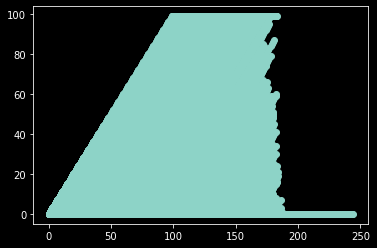

In [57]:
import matplotlib.pyplot as plt
# scatter plot loan_age dlq_status
plt.scatter(macro_clean_df_dummies['LOAN_AGE'], macro_clean_df_dummies['DLQ_STATUS'])

In [59]:
corr = macro_clean_df_dummies.corr()
# get correlations of the features with the target
corr['default_12m'].sort_values(ascending=False)

default_12m                           1.000000
DLQ_STATUS                            0.100454
MOD_FLAG_Y                            0.098804
NON_INTEREST_BEARING_UPB              0.098496
CURRENT_UPB                           0.096656
ORIG_UPB                              0.063204
Delinquency_Rates_SF                  0.061498
Unemployment_Rate                     0.058319
ORIG_RATE                             0.056208
NonPerforming_Loans_to_Total_Loans    0.052409
LOAN_AGE                              0.050078
ORIG_TERM                             0.047760
DTI                                   0.045964
OLTV                                  0.045485
IO_N                                  0.042269
PROP_SF                               0.038816
GDP                                   0.038672
PURPOSE_C                             0.032701
TOT_SCHD_PRNCPL                       0.027690
MI_TYPE                               0.024185
MI_PCT                                0.023247
FIRST_FLAG_N 

# VIF

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
macro_clean_df_dummies.columns

Index(['LOAN_ID', 'ORIG_RATE', 'CURR_RATE', 'ORIG_UPB', 'CURRENT_UPB',
       'ORIG_TERM', 'ORIG_DATE', 'LOAN_AGE', 'OLTV', 'NUM_BO', 'DTI',
       'CSCORE_B', 'CSCORE_C', 'NO_UNITS', 'MI_PCT', 'DLQ_STATUS', 'LAST_UPB',
       'TOT_SCHD_PRNCPL', 'NON_INTEREST_BEARING_UPB', 'MI_TYPE',
       'current_month', 'macro_yr', 'FIRST_FLAG_N', 'FIRST_FLAG_U',
       'FIRST_FLAG_Y', 'PURPOSE_C', 'PURPOSE_P', 'PURPOSE_R', 'PROP_CO',
       'PROP_CP', 'PROP_MH', 'PROP_PU', 'PROP_SF', 'OCC_STAT_I', 'OCC_STAT_P',
       'OCC_STAT_S', 'PRODUCT_FRM', 'PPMT_FLG_N', 'PPMT_FLG_U', 'IO_N', 'IO_U',
       'MOD_FLAG_N', 'MOD_FLAG_U', 'MOD_FLAG_Y', 'Zero_Bal_Code_00',
       'Zero_Bal_Code_01', 'Zero_Bal_Code_03', 'Zero_Bal_Code_06',
       'Zero_Bal_Code_09', 'Zero_Bal_Code_15', 'Zero_Bal_Code_16',
       'default_12m', 'default_24m', 'default_24m_plus', 'Unemployment_Rate',
       'GDP', 'GDP_Growth', 'Inflation', 'Real_Interest_Rate',
       'Lending_Interest_Rate', 'NonPerforming_Loans_to_Total_Loans',
 

In [86]:
# separate data into target and features
# drop columns that are not needed
# X = macro_clean_df_dummies.drop(['default_12m', 'default_24m', 'default_24m_plus', 'DLQ_STATUS', 'LOAN_ID', 'macro_yr'], axis=1)

X = macro_clean_df_dummies.drop([ 'default_12m', 'default_24m', 'default_24m_plus', 'LOAN_ID', 'macro_yr', 'ORIG_DATE', 'current_month'], axis=1)
y = macro_clean_df_dummies['default_12m']



In [89]:
# fillna with mean
X = X.fillna(X.mean())

In [90]:
# calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns


vif

/Users/Kerryn/opt/anaconda3/envs/credit_risk_3.8/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/Kerryn/opt/anaconda3/envs/credit_risk_3.8/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,1.870809e+00,ORIG_RATE
1,4.552608e+00,CURR_RATE
2,4.044962e+00,ORIG_UPB
3,4.225533e+00,CURRENT_UPB
4,1.243175e+00,ORIG_TERM
5,1.669443e+01,LOAN_AGE
6,1.801128e+00,OLTV
7,2.436110e+00,NUM_BO
8,1.067435e+00,DTI
9,1.177467e+00,CSCORE_B


In [95]:
vif.sort_values(by="VIF Factor", inplace=True)
# filter for vif factor between 1 and 5
vif_1_and_5 = vif[vif["VIF Factor"].between(1, 5)]
vif_1_and_5

,VIF Factor,features
8,1.067435,DTI
13,1.069342,DLQ_STATUS
9,1.177467,CSCORE_B
4,1.243175,ORIG_TERM
49,1.247382,GDP_Growth
11,1.283306,NO_UNITS
15,1.341448,TOT_SCHD_PRNCPL
6,1.801128,OLTV
0,1.870809,ORIG_RATE
50,1.989194,Inflation


In [96]:
vif_5_plus = vif[vif["VIF Factor"] > 5]
vif_5_plus

,VIF Factor,features
51,5.762436,Real_Interest_Rate
17,7.069752,MI_TYPE
12,7.287495,MI_PCT
52,7.482961,Lending_Interest_Rate
47,10.615446,Unemployment_Rate
26,11.004434,PROP_MH
55,11.516434,30Yr_Fixed_Mortgage_Average
53,15.101319,NonPerforming_Loans_to_Total_Loans
5,16.694426,LOAN_AGE
54,21.910174,Mortgage_Debt_Service_Payment


In [45]:
# 

,Year,Unemployment_Rate,GDP,GDP_Growth,Inflation,Real_Interest_Rate,Lending_Interest_Rate,NonPerforming_Loans_to_Total_Loans,Mortgage_Debt_Service_Payment,30Yr_Fixed_Mortgage_Average,Delinquency_Rates_SF
0,2000,0.03990,1.025095e+13,0.040772,0.033769,0.068134,0.092333,0.010225,0.056382,0.080535,0.020825
1,2001,0.04730,1.058193e+13,0.009543,0.028262,0.045658,0.069217,0.012975,0.057891,0.069679,0.022950
2,2002,0.05780,1.092911e+13,0.016959,0.015860,0.030686,0.046750,0.014725,0.058068,0.065373,0.021125
3,2003,0.05990,1.145644e+13,0.027962,0.022701,0.021073,0.041225,0.012975,0.058280,0.058270,0.018275
4,2004,0.05530,1.221719e+13,0.038526,0.026772,0.016123,0.043400,0.009550,0.058966,0.058392,0.015525
5,2005,0.05080,1.303920e+13,0.034832,0.033927,0.029605,0.061892,0.007725,0.063558,0.058667,0.015475
6,2006,0.04620,1.381559e+13,0.027828,0.032259,0.047261,0.079575,0.007325,0.067549,0.064133,0.017325
7,2007,0.04620,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.010100,0.070667,0.063373,0.025525
8,2008,0.05780,1.476986e+13,0.001222,0.038391,0.031099,0.050875,0.022100,0.069859,0.060272,0.050075
9,2009,0.09250,1.447806e+13,-0.025999,-0.003555,0.025924,0.032500,0.046975,0.067055,0.050365,0.091375


In [102]:
# get columns where dtype is uint8
cols_uint8 = X.select_dtypes(include=['uint8']).columns.to_list()
cols_uint8

['FIRST_FLAG_N',
 'FIRST_FLAG_U',
 'FIRST_FLAG_Y',
 'PURPOSE_C',
 'PURPOSE_P',
 'PURPOSE_R',
 'PROP_CO',
 'PROP_CP',
 'PROP_MH',
 'PROP_PU',
 'PROP_SF',
 'OCC_STAT_I',
 'OCC_STAT_P',
 'OCC_STAT_S',
 'PRODUCT_FRM',
 'PPMT_FLG_N',
 'PPMT_FLG_U',
 'IO_N',
 'IO_U',
 'MOD_FLAG_N',
 'MOD_FLAG_U',
 'MOD_FLAG_Y',
 'Zero_Bal_Code_00',
 'Zero_Bal_Code_01',
 'Zero_Bal_Code_03',
 'Zero_Bal_Code_06',
 'Zero_Bal_Code_09',
 'Zero_Bal_Code_15',
 'Zero_Bal_Code_16']

In [105]:
# convert uint8 to int
from numpy import int32


X[cols_uint8] = X[cols_uint8].astype(int32)

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3303652 entries, 0 to 3303651
Data columns (total 57 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   ORIG_RATE                           float64
 1   CURR_RATE                           float64
 2   ORIG_UPB                            float64
 3   CURRENT_UPB                         float64
 4   ORIG_TERM                           int32  
 5   LOAN_AGE                            int32  
 6   OLTV                                int32  
 7   NUM_BO                              int32  
 8   DTI                                 int32  
 9   CSCORE_B                            int32  
 10  CSCORE_C                            int32  
 11  NO_UNITS                            int32  
 12  MI_PCT                              float64
 13  DLQ_STATUS                          int32  
 14  LAST_UPB                            float64
 15  TOT_SCHD_PRNCPL                     float64
 16  

In [112]:
# import statsmodels.api as sm

# def forward_regression(X, y,
#                        initial_list=[], 
#                        threshold_in=0.01, 
#                        threshold_out = 0.05, 
#                        verbose=True):
#     initial_list = []
#     included = list(initial_list)
#     while True:
#         changed=False
#         # forward step
#         excluded = list(set(X.columns)-set(included))
#         new_pval = pd.Series(index=excluded, dtype=float)
#         for new_column in excluded:
#             model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
#             new_pval[new_column] = model.pvalues[new_column]
#         best_pval = new_pval.min()
#         if best_pval < threshold_in:
#             best_feature = new_pval.argmin()
#             included.append(best_feature)
#             changed=True
#             if verbose:
#                 print('Add   with p-value '.format(best_feature, best_pval))

#         if not changed:
#             break

#     return included

# # forward_regression(X, y)

In [111]:
def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval}')
        if not changed:
            break
    return included

backward_regression(X, y)

Drop FIRST_FLAG_U with p-value 0.5681466526505766
Drop FIRST_FLAG_N with p-value 0.6299068293123504
Drop PROP_PU with p-value 0.1511988996141883
Drop PROP_MH with p-value 0.6201816122573491


['ORIG_RATE',
 'CURR_RATE',
 'ORIG_UPB',
 'CURRENT_UPB',
 'ORIG_TERM',
 'LOAN_AGE',
 'OLTV',
 'NUM_BO',
 'DTI',
 'CSCORE_B',
 'CSCORE_C',
 'NO_UNITS',
 'MI_PCT',
 'DLQ_STATUS',
 'LAST_UPB',
 'TOT_SCHD_PRNCPL',
 'NON_INTEREST_BEARING_UPB',
 'MI_TYPE',
 'FIRST_FLAG_Y',
 'PURPOSE_C',
 'PURPOSE_P',
 'PURPOSE_R',
 'PROP_CO',
 'PROP_CP',
 'PROP_SF',
 'OCC_STAT_I',
 'OCC_STAT_P',
 'OCC_STAT_S',
 'PRODUCT_FRM',
 'PPMT_FLG_N',
 'PPMT_FLG_U',
 'IO_N',
 'IO_U',
 'MOD_FLAG_N',
 'MOD_FLAG_U',
 'MOD_FLAG_Y',
 'Zero_Bal_Code_00',
 'Zero_Bal_Code_01',
 'Zero_Bal_Code_03',
 'Zero_Bal_Code_06',
 'Zero_Bal_Code_09',
 'Zero_Bal_Code_15',
 'Zero_Bal_Code_16',
 'Unemployment_Rate',
 'GDP',
 'GDP_Growth',
 'Inflation',
 'Real_Interest_Rate',
 'Lending_Interest_Rate',
 'NonPerforming_Loans_to_Total_Loans',
 'Mortgage_Debt_Service_Payment',
 '30Yr_Fixed_Mortgage_Average',
 'Delinquency_Rates_SF']

In [122]:
# calculate weight of evidence for each feature

algos.q

<module 'pandas.core.algorithms' from '/Users/Kerryn/opt/anaconda3/envs/credit_risk_3.8/lib/python3.10/site-packages/pandas/core/algorithms.py'>

In [116]:
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

In [118]:
def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

In [119]:
def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [123]:
def woe(data_in, target, variable, bins, binning):
    
    df = data_in
    df2 = data_in[[target, variable]].rename(columns={target: 'Target', variable: 'Variable'}).dropna()
    
    if binning == 'True':
       df2['key'] = pd.qcut(df2.Variable, bins, default_12ms=False, duplicates='drop')
    if binning == 'False':
       df2['key'] = df2.Variable
    table = pd.crosstab(df2.key, df2.Target, margins= True)
    table = table.drop(['All'], axis=0)
    table = table.rename(columns={1: 'deft', 0: 'nondeft'}).reset_index(drop=False)

    table.loc[:, 'fracdeft'] = table.deft/np.sum(table.deft)
    table.loc[:, 'fracnondeft'] = table.nondeft/np.sum(table.nondeft)

    table.loc[:, 'WOE'] = np.log(table.fracdeft/table.fracnondeft)
    table.loc[:, 'IV'] = (table.fracdeft-table.fracnondeft)*table.WOE
    
    table.rename(columns={'WOE': variable}, inplace=True)
    table=table.add_suffix('_WOE')
    table.rename(columns={table.columns[0]: 'key' }, inplace = True)
    WOE = table.iloc[:, [0,-2]]
    
    df = pd.merge(df, df2.key, right_index=True, left_index=True)
      
    outputWOE = pd.merge(df, WOE, on='key').drop(['key'], axis=1)
    outputIV = pd.DataFrame(data={'name': [variable], 'IV': table.IV_WOE.sum()})
    
    return outputWOE, outputIV

In [145]:
from scipy.stats import spearmanr

class ContinuousFeature():
    def __init__(self, df, feature):
        self.df = df
        self.feature = feature
        self.bin_min_size = int(len(self.df) * 0.05)

    def __generate_bins(self, bins_num):
        df = self.df[[self.feature, 'default_12m']]
        df['bin'] = pd.qcut(df[self.feature], bins_num, duplicates='drop') \
                    .apply(lambda x: x.left) \
                    .astype(float)
        return df

    def __generate_correct_bins(self, bins_max=20):
        for bins_num in range(bins_max, 1, -1):
            df = self.__generate_bins(bins_num)
            df_grouped = pd.DataFrame(df.groupby('bin') \
                                      .agg({self.feature: 'count',
                                            'default_12m': 'sum'})) \
                                      .reset_index()
            r, p = spearmanr(df_grouped['bin'], df_grouped['default_12m'])

            if (
                    abs(r)==1 and                                                        # check if woe for bins are monotonic
                    df_grouped[self.feature].min() > self.bin_min_size                   # check if bin size is greater than 5%
                    and not (df_grouped[self.feature] == df_grouped['default_12m']).any()      # check if number of good and bad is not equal to 0
            ):
                break

        return df

    @property
    def df_lite(self):
        df_lite = self.__generate_correct_bins()
        df_lite['bin'].fillna('MISSING', inplace=True)
        return df_lite[['bin', 'default_12m']]

In [126]:
# select columns with dtype = float
continous_features = macro_clean_df_dummies.dtypes[macro_clean_df_dummies.dtypes == 'float64'].index.to_list()
continous_features

['ORIG_RATE',
 'CURR_RATE',
 'ORIG_UPB',
 'CURRENT_UPB',
 'MI_PCT',
 'LAST_UPB',
 'TOT_SCHD_PRNCPL',
 'NON_INTEREST_BEARING_UPB',
 'Unemployment_Rate',
 'GDP',
 'GDP_Growth',
 'Inflation',
 'Real_Interest_Rate',
 'Lending_Interest_Rate',
 'NonPerforming_Loans_to_Total_Loans',
 'Mortgage_Debt_Service_Payment',
 '30Yr_Fixed_Mortgage_Average',
 'Delinquency_Rates_SF']

In [196]:
woe_data = macro_clean_df_dummies.copy(deep=True)
# convert current month to string, replace - with '_'
woe_data['id_date'] = woe_data["LOAN_ID"] + "-" + woe_data['current_month'].astype(str).str.replace('-', '_')
woe_data = woe_data.set_index('id_date')
# drop default_24m, default_24m_plus, ORIG_DATE, current_month

woe_data.head()
 

,LOAN_ID,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,LOAN_AGE,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,NO_UNITS,MI_PCT,DLQ_STATUS,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE,current_month,macro_yr,FIRST_FLAG_N,FIRST_FLAG_U,FIRST_FLAG_Y,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,PRODUCT_FRM,PPMT_FLG_N,PPMT_FLG_U,IO_N,IO_U,MOD_FLAG_N,MOD_FLAG_U,MOD_FLAG_Y,Zero_Bal_Code_00,Zero_Bal_Code_01,Zero_Bal_Code_03,Zero_Bal_Code_06,Zero_Bal_Code_09,Zero_Bal_Code_15,Zero_Bal_Code_16,default_12m,default_24m,default_24m_plus,Unemployment_Rate,GDP,GDP_Growth,Inflation,Real_Interest_Rate,Lending_Interest_Rate,NonPerforming_Loans_to_Total_Loans,Mortgage_Debt_Service_Payment,30Yr_Fixed_Mortgage_Average,Delinquency_Rates_SF
id_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100055723684-2007_09_30,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,0,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-09-30,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2007_10_31,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,1,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-10-31,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2007_11_30,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,2,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-11-30,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2007_12_31,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,3,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-12-31,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2008_01_31,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,4,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2008-01-31,2008,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0578,1.476986e+13,0.001222,0.038391,0.031099,0.050875,0.0221,0.069859,0.060272,0.050075


In [197]:
woe_data.to_parquet("woe_data_index.parquet")

In [215]:
woe_drop = [
    "LOAN_ID",
    "ORIG_DATE",
    "current_month",
    "macro_yr",
    "default_24m",
    "default_24m_plus",
]

woe_data_use = woe_data.drop(woe_drop, axis=1)
woe_data_use.to_parquet("woe_data_use.parquet")

In [173]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        # print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6))) 
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return woeDF

In [216]:
woe_df = iv_woe(data=woe_data_use, target='default_12m', bins=12, show_woe=False)
woe_df

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,ORIG_RATE,"(4.124, 5.875]",475492,8666,0.084032,466826,0.145859,-0.551440,0.034094
1,ORIG_RATE,"(5.875, 6.0]",279871,6021,0.058384,273850,0.085564,-0.382218,0.010389
2,ORIG_RATE,"(6.0, 6.125]",330315,7893,0.076537,322422,0.100740,-0.274776,0.006651
3,ORIG_RATE,"(6.125, 6.25]",451145,12260,0.118883,438885,0.137129,-0.142787,0.002605
4,ORIG_RATE,"(6.25, 6.375]",480759,15309,0.148448,465450,0.145429,0.020545,0.000062
...,...,...,...,...,...,...,...,...,...
4,Delinquency_Rates_SF,"(0.05008, 0.072]",309318,11395,0.110913,297923,0.093638,0.169311,0.002925
5,Delinquency_Rates_SF,"(0.072, 0.09138]",633341,22821,0.222128,610520,0.191888,0.146341,0.004425
6,Delinquency_Rates_SF,"(0.09138, 0.1036]",255705,11087,0.107915,244618,0.076884,0.339046,0.010521
7,Delinquency_Rates_SF,"(0.1036, 0.104]",316888,12823,0.124813,304065,0.095569,0.266970,0.007807


In [203]:
# woe_df.to_csv('woe_df.csv')

<AxesSubplot:ylabel='Variable'>

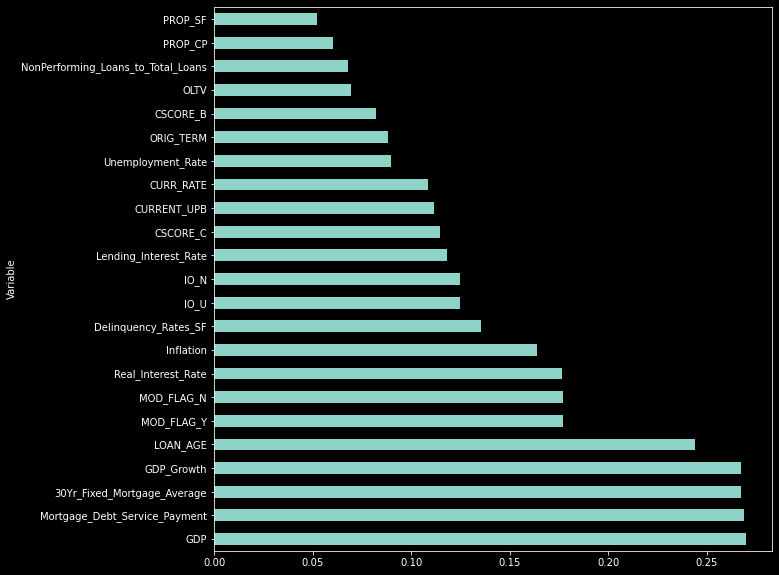

In [217]:
# plot iv_avg_15bins
# drop variables with iv = 0
woe_df_excl_vars = woe_df[woe_df['IV'].between(0.05, 0.5)]

iv_avg_12bins = woe_df_excl_vars.groupby('Variable').IV.mean().sort_values(ascending=False)
iv_avg_12bins.plot(kind='barh', figsize=(10,10))

In [192]:
iv_avg_20bins = woe_df.groupby('Variable').IV.mean()
iv_avg_20bins.sort_values(ascending=False)

Variable
DLQ_STATUS                            4.931389
MOD_FLAG_Y                            0.108435
MOD_FLAG_N                            0.108435
Lending_Interest_Rate                 0.101255
default_24m_plus                      0.101165
IO_U                                  0.064441
IO_N                                  0.064441
default_24m                           0.058084
GDP_Growth                            0.055656
Real_Interest_Rate                    0.051905
Mortgage_Debt_Service_Payment         0.051590
30Yr_Fixed_Mortgage_Average           0.051402
GDP                                   0.047641
Inflation                             0.037479
macro_yr                              0.036874
ORIG_TERM                             0.036593
LOAN_AGE                              0.032854
PROP_CP                               0.032579
PROP_SF                               0.030711
PURPOSE_P                             0.029697
Delinquency_Rates_SF                  0.029251
Unem

In [190]:
iv_avg_15bins = woe_df.groupby('Variable').IV.mean()
iv_avg_15bins.sort_values(ascending=False)

Variable
DLQ_STATUS                            1.741886
MOD_FLAG_Y                            0.108435
MOD_FLAG_N                            0.108435
default_24m_plus                      0.101165
Lending_Interest_Rate                 0.090167
IO_N                                  0.064441
IO_U                                  0.064441
Mortgage_Debt_Service_Payment         0.061675
GDP_Growth                            0.061132
default_24m                           0.058084
Unemployment_Rate                     0.056649
GDP                                   0.056455
30Yr_Fixed_Mortgage_Average           0.051775
Real_Interest_Rate                    0.043582
LOAN_AGE                              0.042453
Inflation                             0.037296
macro_yr                              0.036874
ORIG_TERM                             0.036593
CSCORE_C                              0.034895
CSCORE_B                              0.033325
PROP_CP                               0.032579
PROP

In [188]:
iv_avg_5bins = woe_df.groupby('Variable').IV.mean()
iv_avg_5bins.sort_values(ascending=False)

Variable
MOD_FLAG_N                            0.108435
MOD_FLAG_Y                            0.108435
default_24m_plus                      0.101165
Mortgage_Debt_Service_Payment         0.096029
30Yr_Fixed_Mortgage_Average           0.095982
CSCORE_B                              0.095485
Lending_Interest_Rate                 0.093240
LOAN_AGE                              0.092935
Real_Interest_Rate                    0.086202
CURRENT_UPB                           0.065582
IO_N                                  0.064441
IO_U                                  0.064441
CSCORE_C                              0.063532
default_24m                           0.058084
Delinquency_Rates_SF                  0.040441
Inflation                             0.038430
Unemployment_Rate                     0.037139
macro_yr                              0.036874
PROP_CP                               0.032579
PROP_SF                               0.030711
ORIG_UPB                              0.029784
PURP

In [185]:
# get average IV for all variables 
iv_avg = woe_df.groupby('Variable').IV.mean()
iv_avg.sort_values(ascending=False)

Variable
DLQ_STATUS                            7.194976
Lending_Interest_Rate                 0.120703
MOD_FLAG_Y                            0.108435
MOD_FLAG_N                            0.108435
default_24m_plus                      0.101165
Real_Interest_Rate                    0.077453
30Yr_Fixed_Mortgage_Average           0.076958
Mortgage_Debt_Service_Payment         0.076956
GDP_Growth                            0.067861
IO_N                                  0.064441
IO_U                                  0.064441
LOAN_AGE                              0.059566
default_24m                           0.058084
CSCORE_B                              0.049460
ORIG_TERM                             0.047918
CURRENT_UPB                           0.047709
Inflation                             0.045194
CSCORE_C                              0.042382
GDP                                   0.039712
Delinquency_Rates_SF                  0.037273
macro_yr                              0.036874
PROP

In [178]:
iv_df.to_excel("iv_df.xlsx")

In [170]:
woe_[woe_["IV"].between(0.1, 0.5)]

,Variable,IV
0,ORIG_RATE,0.284130
0,CURR_RATE,0.364785
0,ORIG_UPB,0.339570
0,ORIG_TERM,0.213998
0,ORIG_DATE,0.106077
0,OLTV,0.412528
0,DTI,0.280486
0,CSCORE_C,0.151109
0,MI_PCT,0.177295
0,NON_INTEREST_BEARING_UPB,0.153168


In [171]:
woe_[woe_["IV"] > 0.5]

,Variable,IV
0,CURRENT_UPB,0.727374
0,LOAN_AGE,0.938415
0,CSCORE_B,1.455285
0,DLQ_STATUS,1.022365
0,current_month,0.887867
0,macro_yr,1.024632
0,Unemployment_Rate,0.618802
0,GDP,0.739208
0,GDP_Growth,0.775736
0,Inflation,0.612105


# Binning

In [ ]:
# create bins 


In [114]:
macro_clean_df_dummies.head()

,LOAN_ID,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,LOAN_AGE,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,NO_UNITS,MI_PCT,DLQ_STATUS,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE,current_month,macro_yr,FIRST_FLAG_N,FIRST_FLAG_U,FIRST_FLAG_Y,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,PRODUCT_FRM,PPMT_FLG_N,PPMT_FLG_U,IO_N,IO_U,MOD_FLAG_N,MOD_FLAG_U,MOD_FLAG_Y,Zero_Bal_Code_00,Zero_Bal_Code_01,Zero_Bal_Code_03,Zero_Bal_Code_06,Zero_Bal_Code_09,Zero_Bal_Code_15,Zero_Bal_Code_16,default_12m,default_24m,default_24m_plus,Unemployment_Rate,GDP,GDP_Growth,Inflation,Real_Interest_Rate,Lending_Interest_Rate,NonPerforming_Loans_to_Total_Loans,Mortgage_Debt_Service_Payment,30Yr_Fixed_Mortgage_Average,Delinquency_Rates_SF
0,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,0,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-09-30,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
1,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,1,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-10-31,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
2,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,2,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-11-30,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
3,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,3,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2007-12-31,2007,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
4,100055723684,6.875,6.875,331000.0,0.0,360,2007-09-20,4,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,2008-01-31,2008,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0578,1.476986e+13,0.001222,0.038391,0.031099,0.050875,0.0221,0.069859,0.060272,0.050075


In [115]:
macro_clean_df_dummies.columns

Index(['LOAN_ID', 'ORIG_RATE', 'CURR_RATE', 'ORIG_UPB', 'CURRENT_UPB',
       'ORIG_TERM', 'ORIG_DATE', 'LOAN_AGE', 'OLTV', 'NUM_BO', 'DTI',
       'CSCORE_B', 'CSCORE_C', 'NO_UNITS', 'MI_PCT', 'DLQ_STATUS', 'LAST_UPB',
       'TOT_SCHD_PRNCPL', 'NON_INTEREST_BEARING_UPB', 'MI_TYPE',
       'current_month', 'macro_yr', 'FIRST_FLAG_N', 'FIRST_FLAG_U',
       'FIRST_FLAG_Y', 'PURPOSE_C', 'PURPOSE_P', 'PURPOSE_R', 'PROP_CO',
       'PROP_CP', 'PROP_MH', 'PROP_PU', 'PROP_SF', 'OCC_STAT_I', 'OCC_STAT_P',
       'OCC_STAT_S', 'PRODUCT_FRM', 'PPMT_FLG_N', 'PPMT_FLG_U', 'IO_N', 'IO_U',
       'MOD_FLAG_N', 'MOD_FLAG_U', 'MOD_FLAG_Y', 'Zero_Bal_Code_00',
       'Zero_Bal_Code_01', 'Zero_Bal_Code_03', 'Zero_Bal_Code_06',
       'Zero_Bal_Code_09', 'Zero_Bal_Code_15', 'Zero_Bal_Code_16',
       'default_12m', 'default_24m', 'default_24m_plus', 'Unemployment_Rate',
       'GDP', 'GDP_Growth', 'Inflation', 'Real_Interest_Rate',
       'Lending_Interest_Rate', 'NonPerforming_Loans_to_Total_Loans',
 

In [220]:
woe_data_use.head()

,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,LOAN_AGE,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,NO_UNITS,MI_PCT,DLQ_STATUS,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE,FIRST_FLAG_N,FIRST_FLAG_U,FIRST_FLAG_Y,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,PRODUCT_FRM,PPMT_FLG_N,PPMT_FLG_U,IO_N,IO_U,MOD_FLAG_N,MOD_FLAG_U,MOD_FLAG_Y,Zero_Bal_Code_00,Zero_Bal_Code_01,Zero_Bal_Code_03,Zero_Bal_Code_06,Zero_Bal_Code_09,Zero_Bal_Code_15,Zero_Bal_Code_16,default_12m,Unemployment_Rate,GDP,GDP_Growth,Inflation,Real_Interest_Rate,Lending_Interest_Rate,NonPerforming_Loans_to_Total_Loans,Mortgage_Debt_Service_Payment,30Yr_Fixed_Mortgage_Average,Delinquency_Rates_SF
id_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100055723684-2007_09_30,6.875,6.875,331000.0,0.0,360,0,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2007_10_31,6.875,6.875,331000.0,0.0,360,1,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2007_11_30,6.875,6.875,331000.0,0.0,360,2,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2007_12_31,6.875,6.875,331000.0,0.0,360,3,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2008_01_31,6.875,6.875,331000.0,0.0,360,4,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0578,1.476986e+13,0.001222,0.038391,0.031099,0.050875,0.0221,0.069859,0.060272,0.050075


In [228]:
# calculate current ltv
macro_clean_df_dummies['CURRENT_LTV'] = macro_clean_df_dummies['CURRENT_UPB'] / macro_clean_df_dummies['ORIG_UPB'] * 100


array([ 0.        , 99.48866163, 99.40172205, ..., 80.03822222,
       79.60146667, 79.16244444])

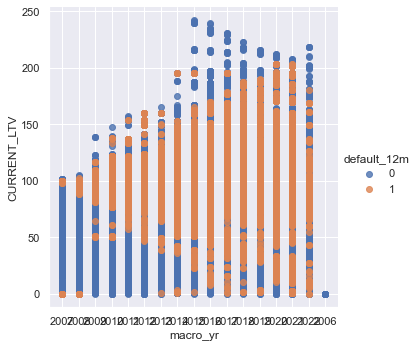

In [235]:
import seaborn as sns
#plot CURRENT_LTV over current_month hue default_12m
# make plot biggger
sns.set(rc={'figure.figsize':(12,12)})
sns.lmplot(x='macro_yr', y='CURRENT_LTV', data=macro_clean_df_dummies, hue='default_12m', fit_reg=False)


In [236]:
woe_data_use.columns

Index(['ORIG_RATE', 'CURR_RATE', 'ORIG_UPB', 'CURRENT_UPB', 'ORIG_TERM',
       'LOAN_AGE', 'OLTV', 'NUM_BO', 'DTI', 'CSCORE_B', 'CSCORE_C', 'NO_UNITS',
       'MI_PCT', 'DLQ_STATUS', 'LAST_UPB', 'TOT_SCHD_PRNCPL',
       'NON_INTEREST_BEARING_UPB', 'MI_TYPE', 'FIRST_FLAG_N', 'FIRST_FLAG_U',
       'FIRST_FLAG_Y', 'PURPOSE_C', 'PURPOSE_P', 'PURPOSE_R', 'PROP_CO',
       'PROP_CP', 'PROP_MH', 'PROP_PU', 'PROP_SF', 'OCC_STAT_I', 'OCC_STAT_P',
       'OCC_STAT_S', 'PRODUCT_FRM', 'PPMT_FLG_N', 'PPMT_FLG_U', 'IO_N', 'IO_U',
       'MOD_FLAG_N', 'MOD_FLAG_U', 'MOD_FLAG_Y', 'Zero_Bal_Code_00',
       'Zero_Bal_Code_01', 'Zero_Bal_Code_03', 'Zero_Bal_Code_06',
       'Zero_Bal_Code_09', 'Zero_Bal_Code_15', 'Zero_Bal_Code_16',
       'default_12m', 'Unemployment_Rate', 'GDP', 'GDP_Growth', 'Inflation',
       'Real_Interest_Rate', 'Lending_Interest_Rate',
       'NonPerforming_Loans_to_Total_Loans', 'Mortgage_Debt_Service_Payment',
       '30Yr_Fixed_Mortgage_Average', 'Delinquency_Rates_SF'],


In [240]:
woe_data_use_12_24 = woe_data_use.copy()

# create var for default_24m where DLQ_STATUS between 13 and 24
woe_data_use_12_24['default_24m'] = np.where(woe_data_use_12_24['DLQ_STATUS'].between(13,24), 1, 0)

woe_data_use_12_24['CURRENT_LTV'] = woe_data_use_12_24['CURRENT_UPB'] / woe_data_use_12_24['ORIG_UPB'] * 100

# fillna with mean 

woe_data_use_12_24 = woe_data_use_12_24.fillna(woe_data_use_12_24.mean())

In [259]:
woe_data_use_12_24.isna().sum()

ORIG_RATE                                 0
CURR_RATE                                 0
ORIG_UPB                                  0
CURRENT_UPB                               0
ORIG_TERM                                 0
LOAN_AGE                                  0
OLTV                                      0
NUM_BO                                    0
DTI                                       0
CSCORE_B                                  0
CSCORE_C                                  0
NO_UNITS                                  0
MI_PCT                                    0
DLQ_STATUS                                0
LAST_UPB                                  0
TOT_SCHD_PRNCPL                           0
NON_INTEREST_BEARING_UPB                  0
MI_TYPE                                   0
FIRST_FLAG_N                              0
FIRST_FLAG_U                              0
FIRST_FLAG_Y                              0
PURPOSE_C                                 0
PURPOSE_P                       

In [244]:
woe_data_use_12_24.head()

,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,LOAN_AGE,OLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,NO_UNITS,MI_PCT,DLQ_STATUS,LAST_UPB,TOT_SCHD_PRNCPL,NON_INTEREST_BEARING_UPB,MI_TYPE,FIRST_FLAG_N,FIRST_FLAG_U,FIRST_FLAG_Y,PURPOSE_C,PURPOSE_P,PURPOSE_R,PROP_CO,PROP_CP,PROP_MH,PROP_PU,PROP_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,PRODUCT_FRM,PPMT_FLG_N,PPMT_FLG_U,IO_N,IO_U,MOD_FLAG_N,MOD_FLAG_U,MOD_FLAG_Y,Zero_Bal_Code_00,Zero_Bal_Code_01,Zero_Bal_Code_03,Zero_Bal_Code_06,Zero_Bal_Code_09,Zero_Bal_Code_15,Zero_Bal_Code_16,default_12m,Unemployment_Rate,GDP,GDP_Growth,Inflation,Real_Interest_Rate,Lending_Interest_Rate,NonPerforming_Loans_to_Total_Loans,Mortgage_Debt_Service_Payment,30Yr_Fixed_Mortgage_Average,Delinquency_Rates_SF,default_24m,CURRENT_LTV
id_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100055723684-2007_09_30,6.875,6.875,331000.0,0.0,360,0,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525,0,0.0
100055723684-2007_10_31,6.875,6.875,331000.0,0.0,360,1,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525,0,0.0
100055723684-2007_11_30,6.875,6.875,331000.0,0.0,360,2,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525,0,0.0
100055723684-2007_12_31,6.875,6.875,331000.0,0.0,360,3,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525,0,0.0
100055723684-2008_01_31,6.875,6.875,331000.0,0.0,360,4,71,2,40,623,609,1,-1.0,0,-999999.99,-999999.99,-999999.99,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0578,1.476986e+13,0.001222,0.038391,0.031099,0.050875,0.0221,0.069859,0.060272,0.050075,0,0.0


# PiT variables

In [265]:
pit_var = [
    'default_12m',
    'default_24m',
    'CURR_RATE',
    'CURRENT_UPB',
    'LOAN_AGE',
    'CURRENT_LTV',
    'Unemployment_Rate',
    'GDP', 
    'GDP_Growth', 
    'Inflation', 
    'Real_Interest_Rate',
    'Lending_Interest_Rate', 
    'NonPerforming_Loans_to_Total_Loans',
    'Mortgage_Debt_Service_Payment', 
    '30Yr_Fixed_Mortgage_Average',
    'Delinquency_Rates_SF',

]

In [266]:
pit_data_12m = woe_data_use_12_24[pit_var]
pit_data_12m = pit_data_12m.dropna()
pit_data_12m.head()

,default_12m,default_24m,CURR_RATE,CURRENT_UPB,LOAN_AGE,CURRENT_LTV,Unemployment_Rate,GDP,GDP_Growth,Inflation,Real_Interest_Rate,Lending_Interest_Rate,NonPerforming_Loans_to_Total_Loans,Mortgage_Debt_Service_Payment,30Yr_Fixed_Mortgage_Average,Delinquency_Rates_SF
id_date,,,,,,,,,,,,,,,,
100055723684-2007_09_30,0,0,6.875,0.0,0,0.0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2007_10_31,0,0,6.875,0.0,1,0.0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2007_11_30,0,0,6.875,0.0,2,0.0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2007_12_31,0,0,6.875,0.0,3,0.0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2008_01_31,0,0,6.875,0.0,4,0.0,0.0578,1.476986e+13,0.001222,0.038391,0.031099,0.050875,0.0221,0.069859,0.060272,0.050075


In [ ]:
# rate
woe_data_use_12_24['CRATE_0_5'] = np.where(pit_data_12m['CURR_RATE'].between(0,5.0), 1, 0)
woe_data_use_12_24['CRATE_5_6pt5'] = np.where(pit_data_12m['CURR_RATE'].between(5,6.5), 1, 0)
woe_data_use_12_24['CRATE_6pt5_6pt75'] = np.where(pit_data_12m['CURR_RATE'].between(6.5,6.75), 1, 0)
woe_data_use_12_24['CRATE_6pt75_up'] = np.where(pit_data_12m['CURR_RATE'] > 6.75, 1, 0)



In [249]:
woe_df_updated = iv_woe(data=woe_data_use_12_24, target='default_12m', bins=6, show_woe=False)
woe_df_updated

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,ORIG_RATE,"(4.124, 6.0]",755363,14687,0.142417,740676,0.231423,-0.485492,0.043212
1,ORIG_RATE,"(6.0, 6.25]",781460,20153,0.195419,761307,0.237869,-0.196575,0.008345
2,ORIG_RATE,"(6.25, 6.375]",480759,15309,0.148448,465450,0.145429,0.020545,0.000062
3,ORIG_RATE,"(6.375, 6.5]",408947,14508,0.140681,394439,0.123242,0.132345,0.002308
4,ORIG_RATE,"(6.5, 6.75]",481534,18564,0.180011,462970,0.144654,0.218671,0.007731
...,...,...,...,...,...,...,...,...,...
1,CURRENT_LTV,"(73.619, 88.819]",550609,12704,0.123188,537905,0.168068,-0.310656,0.013942
2,CURRENT_LTV,"(88.819, 93.937]",550608,17571,0.170382,533037,0.166547,0.022768,0.000087
3,CURRENT_LTV,"(93.937, 96.519]",550611,19981,0.193751,530630,0.165795,0.155826,0.004356
4,CURRENT_LTV,"(96.519, 98.232]",550606,24611,0.238647,525995,0.164346,0.373011,0.027715


In [250]:
# woe_df_updated.to_excel("woe_df_updated.xlsx")


In [ ]:
# create current_rate variables based on bins
pit_data_12m['CURRENT_RATE_12m'] = np.where(pit_data_12m['CURR_RATE'].between(0,0.25), 1, 0)

In [267]:
x_pit_12m_vars = pit_var = [
    'CURR_RATE',
    'CURRENT_UPB',
    'LOAN_AGE',
    'CURRENT_LTV',
    'Unemployment_Rate',
    'GDP', 
    'GDP_Growth', 
    'Inflation', 
    'Real_Interest_Rate',
    'Lending_Interest_Rate', 
    'NonPerforming_Loans_to_Total_Loans',
    'Mortgage_Debt_Service_Payment', 
    '30Yr_Fixed_Mortgage_Average',
    'Delinquency_Rates_SF',
]

y_pit_12m_vars = 'default_12m'

In [268]:
# fillna with mean
pit_data_12m.isna().sum()


default_12m                           0
default_24m                           0
CURR_RATE                             0
CURRENT_UPB                           0
LOAN_AGE                              0
CURRENT_LTV                           0
Unemployment_Rate                     0
GDP                                   0
GDP_Growth                            0
Inflation                             0
Real_Interest_Rate                    0
Lending_Interest_Rate                 0
NonPerforming_Loans_to_Total_Loans    0
Mortgage_Debt_Service_Payment         0
30Yr_Fixed_Mortgage_Average           0
Delinquency_Rates_SF                  0
dtype: int64

In [269]:

pit_data_12m.head()

,default_12m,default_24m,CURR_RATE,CURRENT_UPB,LOAN_AGE,CURRENT_LTV,Unemployment_Rate,GDP,GDP_Growth,Inflation,Real_Interest_Rate,Lending_Interest_Rate,NonPerforming_Loans_to_Total_Loans,Mortgage_Debt_Service_Payment,30Yr_Fixed_Mortgage_Average,Delinquency_Rates_SF
id_date,,,,,,,,,,,,,,,,
100055723684-2007_09_30,0,0,6.875,0.0,0,0.0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2007_10_31,0,0,6.875,0.0,1,0.0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2007_11_30,0,0,6.875,0.0,2,0.0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2007_12_31,0,0,6.875,0.0,3,0.0,0.0462,1.447423e+13,0.020105,0.028527,0.052068,0.080500,0.0101,0.070667,0.063373,0.025525
100055723684-2008_01_31,0,0,6.875,0.0,4,0.0,0.0578,1.476986e+13,0.001222,0.038391,0.031099,0.050875,0.0221,0.069859,0.060272,0.050075


In [270]:
# train test split
from sklearn.model_selection import train_test_split
X_pit_12_train, X_pit_12_test, y_pit_12__train, y_pit_12__test = train_test_split(pit_data_12m[x_pit_12m_vars], pit_data_12m['default_12m'], test_size=0.3, random_state=42)

In [272]:
# train model with logistic regression
from sklearn.linear_model import LogisticRegression
pit12_logreg = LogisticRegression()
pit12_logreg.fit(X_pit_12_train, y_pit_12__train)
y_pred_pit12 = pit12_logreg.predict(X_pit_12_test)

# get accuracy
from sklearn.metrics import accuracy_score
pit12_acc = accuracy_score(y_pit_12__test, pit12_logreg.predict(X_pit_12_test))
print(pit12_acc)

# gget roc auc
from sklearn.metrics import roc_auc_score
pit12_roc = roc_auc_score(y_pit_12__test, pit12_logreg.predict(X_pit_12_test))
print(pit12_roc)

/Users/Kerryn/opt/anaconda3/envs/credit_risk_3.8/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9690231042864464
0.5


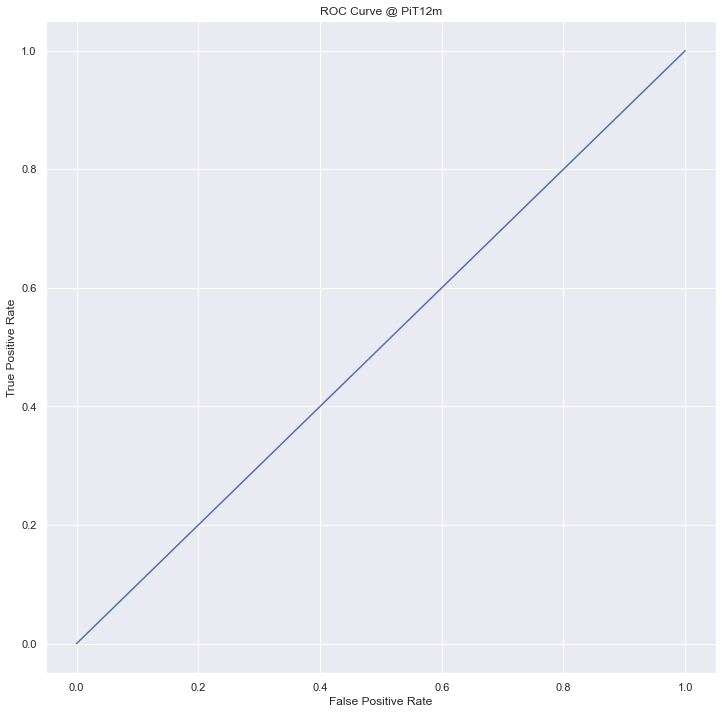

In [275]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, auc
y_pred_proba_pit12m = pit12_logreg.predict_proba(X_pit_12_test)[::,1]
fpr_pit12, tpr_pit12, _ = roc_curve(y_pit_12__test,  y_pred_proba_pit12m)

plt.title('ROC Curve @ PiT12m')
plt.plot(fpr_pit12,tpr_pit12)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [278]:
# random forest
from sklearn.ensemble import RandomForestClassifier
pit12_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
pit12_rf.fit(X_pit_12_train, y_pit_12__train)
y_pred_pit12_rf = pit12_rf.predict(X_pit_12_test)

In [279]:
print(accuracy_score(y_pit_12__test, y_pred_pit12_rf))

0.9690231042864464


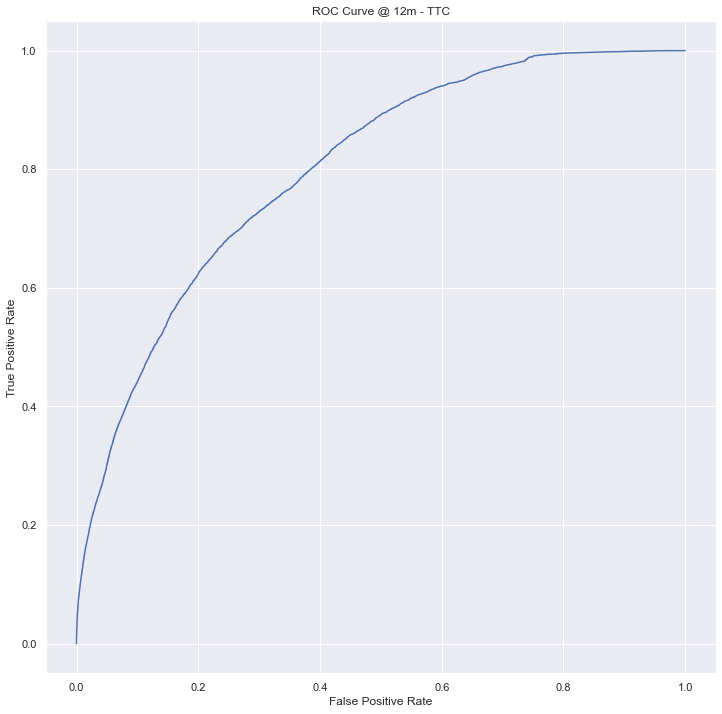

In [282]:
y_pred_proba_rf_pit12 = pit12_rf.predict_proba(X_pit_12_test)[::,1]
fpr_rf, tpr_rf, _rf = roc_curve(y_pit_12__test,  y_pred_proba_rf_pit12)

plt.title('ROC Curve @ 12m - TTC')
plt.plot(fpr_rf,tpr_rf)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# TTC

In [227]:
ttc_macro = macro[macro['macro_yr'] == '2007']
# ttc_macro.T.to_dict()

ttc_macro_dict_2007 = {'Unemployment_Rate': 0.046199999,
  'GDP': 14474226905000.0,
  'GDP_Growth': 0.020105076,
  'Inflation': 0.028526725,
  'Real_Interest_Rate': 0.052067594,
  'Lending_Interest_Rate': 0.0805,
  'NonPerforming_Loans_to_Total_Loans': 0.0101,
  'Mortgage_Debt_Service_Payment': 0.070667463,
  '30Yr_Fixed_Mortgage_Average': 0.063373077,
  'Delinquency_Rates_SF': 0.025525,}